# Dejunkifying a Plot
In this lecture, I want to walk you through the process of taking a regular Matplotlib plot and applying Tufte's principles of data-ink ratio and chartjunk to make it just a little bit better. I'm going to walk through all of the steps using the Jupyter notebooks and you're welcome to follow along.

But if you want a bit more of a challenge, I'll be including in video quizzes along the way which prompts you to solve the problem before I address.

Let's get started -- We will use a plot of data on the popularity of programming languages from Stack Overflow for the year 2016.

See the data here: [http://stackoverflow.com/research/developer-survey-2016#most-popular-technologies-per-occupation](http://stackoverflow.com/research/developer-survey-2016#most-popular-technologies-per-occupation)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

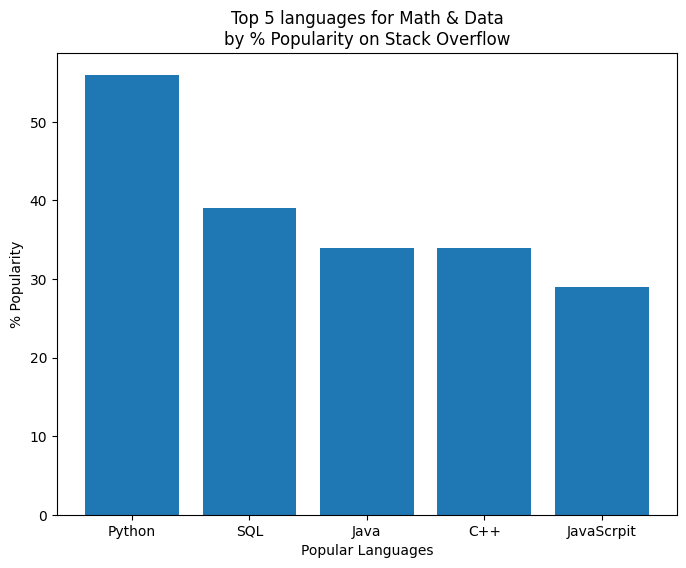

In [6]:
languages = ['Python', 'SQL', 'Java', 'C++', 'JavaScrpit']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.figure(figsize=(8, 6))
plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.xlabel('Popular Languages')
plt.ylabel('% Popularity')
plt.title('Top 5 languages for Math & Data\nby % Popularity on Stack Overflow');

Okay, here's the first challenge -- our plot has this frame around it, but it's not really necessary and it seems a little heavyweight.

Let's remove that ink. This is a bit more involved, but we can get the current axis, then iterate through all the spine, setting their visibility to false.

Already that will make the chart look much more lightweight.

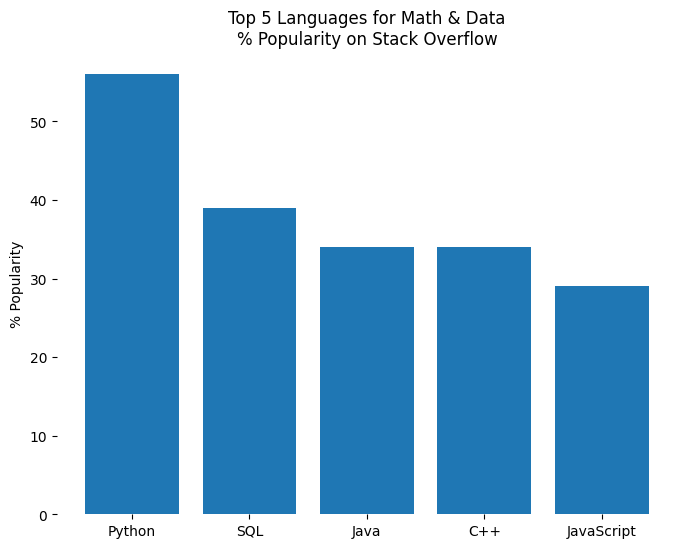

In [20]:
languages = ['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))

popularity = [56, 39, 34, 34, 29]

plt.figure(figsize=(8,6))
plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages);

plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data\n% Popularity on Stack Overflow');

for spine in plt.gca().spines.values():
    spine.set_visible(False)

Now, the blue is okay, but it doesn't really help us differentiate between the bars at all. How about we soften all of the hard blacks to gray, then we change the bar colors to gray as well?

Also, let's keep the Python bar the same color of blue that it was originally to make it stand out.

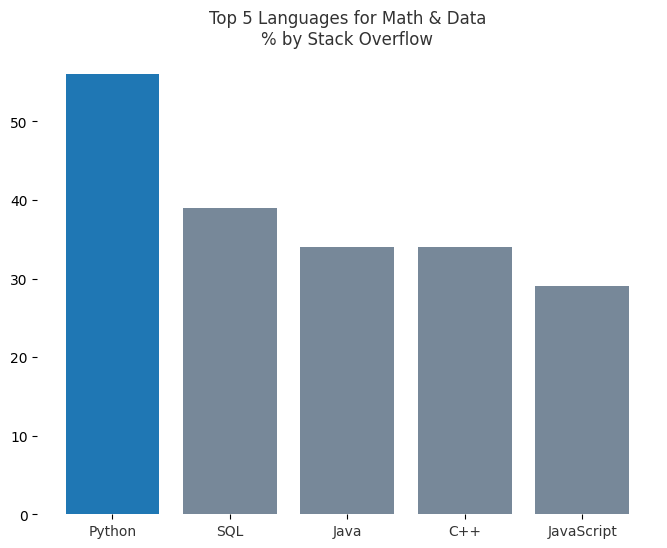

In [33]:
plt.figure(figsize=(8,6))
languages = ['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

bars = plt.bar(pos, popularity, align='center', color='lightslategrey', linewidth=0)
bars[0].set_color('#1F77B4')
plt.xticks(pos, languages, alpha=0.8)
plt.title('Top 5 Languages for Math & Data\n% by Stack Overflow', alpha=0.8);

for spine in plt.gca().spines.values():
    spine.set_visible(False)

Now let's fix the y axis by removing the labels and just directly labeling the individual bars.

We don't really need the y axis label, since the title tells us everything we need to know about the units in this chart.

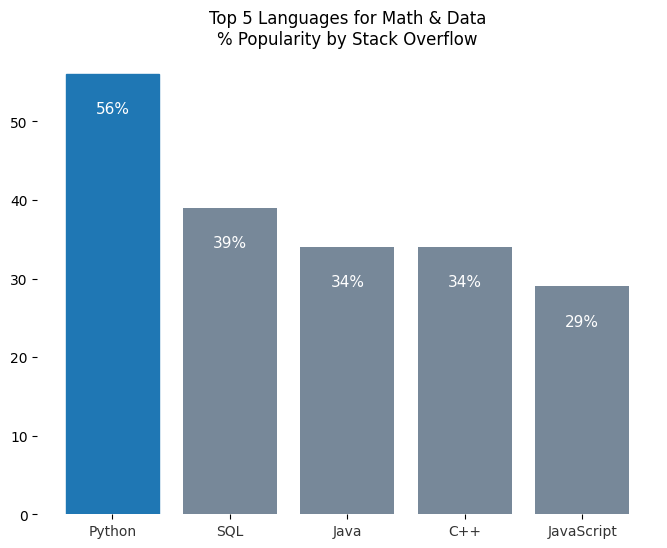

In [43]:
plt.figure(figsize=(8,6))

languages = ['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

bars = plt.bar(pos, popularity, align='center', color='lightslategrey')
bars[0].set_color('#1F77B4') 
plt.xticks(pos, languages, alpha=0.8)

plt.title('Top 5 Languages for Math & Data\n% Popularity by Stack Overflow')

for spine in plt.gca().spines.values():
    spine.set_visible(False)

for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width() /2, bar.get_height() - 5, str(int(height)) + '%',
                  ha='center', color='w', fontsize=11)

And that's all there is to it. A simple series of steps to make your bar charts a little bit more usable.

When you were watching this video, did you find a different way to do things? Perhaps other elements from Tufte or Cairo that you think could be used to make this more readable?

Feel free to go into the discussion forums and share them with me and your classmates.